In [22]:
import pandas as pd

In [23]:
solar_irradiance_values = [3.2, 2.8, 2.6]
panel_area_values = [20, 25, 30]
panel_efficiency_values = [0.15, 0.18, 0.20]

In [24]:
data = []

for si in solar_irradiance_values:
    for pa in panel_area_values:
        for pe in panel_efficiency_values:
            eo = si * pa * pe
            data.append([si, pa, pe, eo])

In [25]:
df = pd.DataFrame(data, columns=['SI', 'PA', 'PE', 'EO'])

In [26]:
df

,SI,PA,PE,EO
0,3.2,20,0.15,9.60
1,3.2,20,0.18,11.52
2,3.2,20,0.20,12.80
3,3.2,25,0.15,12.00
4,3.2,25,0.18,14.40
5,3.2,25,0.20,16.00
6,3.2,30,0.15,14.40
7,3.2,30,0.18,17.28
8,3.2,30,0.20,19.20
9,2.8,20,0.15,8.40


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
x = df[['SI', 'PA', 'PE']]
y = df['EO']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
x

,SI,PA,PE
0,3.2,20,0.15
1,3.2,20,0.18
2,3.2,20,0.20
3,3.2,25,0.15
4,3.2,25,0.18
5,3.2,25,0.20
6,3.2,30,0.15
7,3.2,30,0.18
8,3.2,30,0.20
9,2.8,20,0.15


In [30]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
y_pred = gbr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.49357605220695727
Mean Squared Error (MSE): 0.31844302524105744
R² Score: 0.9749789677279233


In [33]:
import matplotlib.pyplot as plt

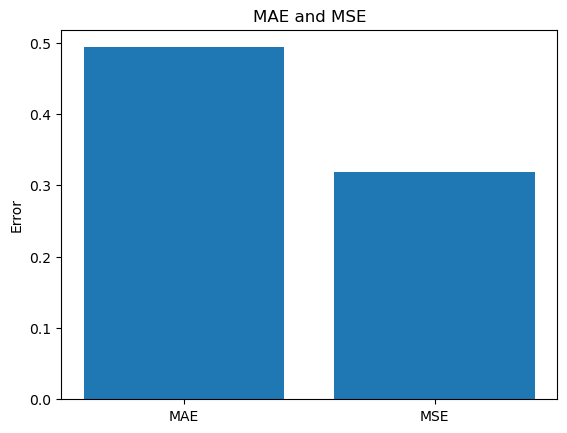

In [34]:
labels = ['MAE', 'MSE']
values = [mae, mse]

plt.bar(labels, values)
plt.title('MAE and MSE')
plt.ylabel('Error')
plt.show()

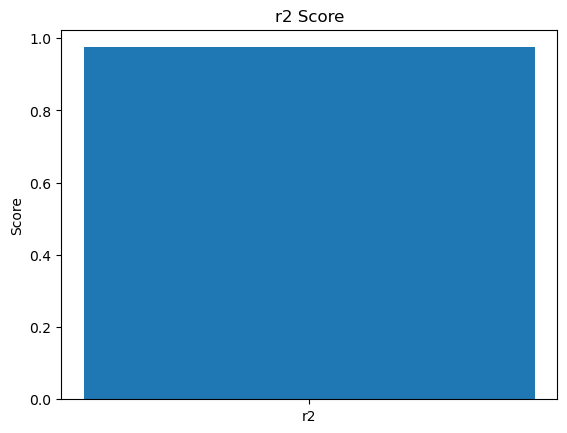

In [55]:
label = ['r2']
value = [r2]

plt.bar(label, value)
plt.title('r2 Score')
plt.ylabel('Score')
plt.show()

In [35]:
new_input = np.array([[3.0, 22, 0.16], [2.4, 12, 0.25], [3.7, 40, 0.12], [4.5, 28, 0.20]])

predicted_output = gbr.predict(new_input)

for i, output in enumerate(predicted_output):
    print(f"Predicted Energy Output for input {i + 1}: {output:.4f}")

Predicted Energy Output for input 1: 8.2517
Predicted Energy Output for input 2: 10.3747
Predicted Energy Output for input 3: 14.4136
Predicted Energy Output for input 4: 18.5707


C:\Users\simon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [36]:
import joblib

In [37]:
joblib.dump(gbr, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']